In [1]:
import pandas as pd
import os

In [11]:
data_list = [pd.read_csv(f'./Power/{name}',skiprows=3)for name in os.listdir('./Power/')]
data_list = [dataframe.drop('Unnamed: 0',axis=1) for dataframe in data_list]
data_list = [dataframe.drop('result',axis=1) for dataframe in data_list]

In [17]:
def pivoting(data:pd.DataFrame,name:str,value:str):
    columns = list(data[name].unique())
    new_data = pd.Series()
    for column in columns:
        column_data = data[data[name]==column][value]
        column_data = column_data.reset_index(drop=True)
        new_data=pd.concat([new_data,column_data],axis=1,ignore_index=True) 
    new_data = new_data.iloc[:,1:]
    new_data.columns= columns
    new_data.index = list(data['_time'].unique())
    return new_data

In [28]:
data_list[0]['_time'].value_counts(), data_list[0]['_field'].nunique() # 둘이 맞음 

(_time
 2023-08-23T01:46:40.062Z    44
 2023-08-23T10:14:39.3Z      44
 2023-08-23T10:22:39.288Z    44
 2023-08-23T10:26:39.282Z    44
 2023-08-23T10:30:39.276Z    44
                             ..
 2023-08-23T06:30:39.636Z    44
 2023-08-23T06:34:39.63Z     44
 2023-08-23T06:38:39.624Z    44
 2023-08-23T06:42:39.618Z    44
 2023-08-23T14:59:59Z        44
 Name: count, Length: 197, dtype: int64,
 44)

In [46]:
new_data = [pivoting(dataframe,'_field','_value') for dataframe in data_list]
for df in new_data:
    df.index = pd.to_datetime(df.index, format='ISO8601', utc=True)
    timedeltas = df.index.to_series().diff()
    print(timedeltas.value_counts())

0 days 00:03:59.994000    194
0 days 00:15:59.976000      1
0 days 00:01:20.126000      1
Name: count, dtype: int64
0 days 00:03:59.994000    359
0 days 00:01:22.286000      1
Name: count, dtype: int64
0 days 00:03:59.994000    359
0 days 00:01:24.446000      1
Name: count, dtype: int64
0 days 00:03:59.994000    359
0 days 00:01:26.606000      1
Name: count, dtype: int64
0 days 00:03:59.994000    359
0 days 00:01:28.766000      1
Name: count, dtype: int64
0 days 00:03:59.994000    359
0 days 00:01:30.926000      1
Name: count, dtype: int64
0 days 00:03:59.994000    359
0 days 00:01:33.086000      1
Name: count, dtype: int64
0 days 00:03:59.994000    359
0 days 00:01:35.246000      1
Name: count, dtype: int64
0 days 00:03:59.994000    359
0 days 00:01:37.406000      1
Name: count, dtype: int64
0 days 00:03:59.994000    359
0 days 00:01:39.566000      1
Name: count, dtype: int64
0 days 00:03:59.994000    359
0 days 00:01:41.726000      1
Name: count, dtype: int64
0 days 00:03:59.994000  

<Axes: >

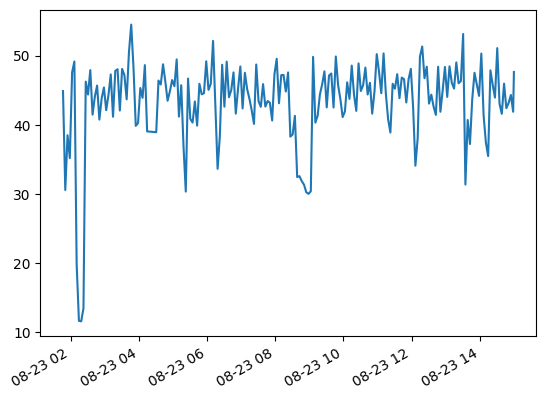

In [62]:
new_data[0].iloc[:,1].plot()